In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [22]:
df = pd.read_csv('Boston.csv')
df.head()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [23]:
df.shape

(506, 15)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   crim        506 non-null    float64
 2   zn          506 non-null    float64
 3   indus       506 non-null    float64
 4   chas        506 non-null    int64  
 5   nox         506 non-null    float64
 6   rm          506 non-null    float64
 7   age         506 non-null    float64
 8   dis         506 non-null    float64
 9   rad         506 non-null    int64  
 10  tax         506 non-null    int64  
 11  ptratio     506 non-null    float64
 12  black       506 non-null    float64
 13  lstat       506 non-null    float64
 14  medv        506 non-null    float64
dtypes: float64(11), int64(4)
memory usage: 59.4 KB


In [25]:
df['Price']=df['medv']
df.drop('medv',axis=1,inplace=True)
df.head()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,Price
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [26]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [27]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,Price
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [28]:
#selecting the independent and dependent feature
X = df.iloc[:365,:-1]
y = df.iloc[:365,-1]

In [29]:
#Standardscaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)
X 

array([[-5.23087675e-01,  8.59366549e-02, -1.01203815e+00, ...,
        -1.12854179e+00,  4.16701153e-01, -9.29230102e-01],
       [-5.00951794e-01, -6.02604592e-01, -2.44178087e-01, ...,
         2.72744364e-03,  4.16701153e-01, -2.14437716e-01],
       [-5.00972886e-01, -6.02604592e-01, -2.44178087e-01, ...,
         2.72744364e-03,  3.14239141e-01, -1.09246394e+00],
       ...,
       [ 3.34926775e+00, -6.02604592e-01,  1.53512791e+00, ...,
         1.08874591e+00,  1.11328420e-02, -3.40213684e-02],
       [ 3.92314494e+00, -6.02604592e-01,  1.53512791e+00, ...,
         1.08874591e+00, -6.87471791e-01,  7.30600294e-01],
       [ 3.13419431e+00, -6.02604592e-01,  1.53512791e+00, ...,
         1.08874591e+00, -6.49457629e-01, -8.75964323e-01]])

In [30]:
#splitting the data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size =0.33,random_state = 42)

In [31]:
#importing DTR
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
model.fit(X_train,y_train)

DecisionTreeRegressor()

In [32]:
y_pred = model.predict(X_test)

In [33]:
y_pred

array([29. , 14.3, 20.4, 24. , 32. , 28.4, 20.4, 16.2, 23.8, 14.3, 19. ,
       29.1, 33.4, 34.7, 19.2, 30.3, 28.4, 28.5, 22.5, 28.7, 18.9, 24. ,
       21.7, 35.2, 18.6, 50. , 29.9, 28. , 30.3, 21.7, 14.8, 19.5, 24.7,
       23.4, 33.8, 20.5, 22. , 21. , 23.9, 20.1, 18.6, 22.6, 14.3, 19.7,
       19.3, 30.1, 21.9, 22. , 21.6, 24.7, 39.8, 17.8, 50. , 50. , 22.6,
       19.5, 22.9, 23.6, 21.7, 24.1, 32.7, 23.9, 20.4, 19.7, 24. , 24.2,
       39.8, 16.2, 50. , 22.3, 22.9, 34.9, 25. , 21.7, 19. , 50. , 24.1,
       18.6, 24.5, 20.4, 22.6, 24.7, 16.5, 21.5, 19.3, 22.5, 18.6, 23.4,
       26.4, 19.3, 25. , 22.5, 23.8, 50. , 22.3, 29.9, 14.3, 17.8, 15.4,
       19.6, 33.8, 25. , 21.5, 21.2, 14.5, 24. , 30.1, 23. , 13.4, 22.6,
       50. , 31.6, 30.7, 20.4, 11.8, 21.2, 50. , 14.8, 43.8, 19.3, 44. ])

In [34]:
#checking the r squared score
from sklearn.metrics import r2_score
score = r2_score(y_test,y_pred)
score

0.8253942550504942

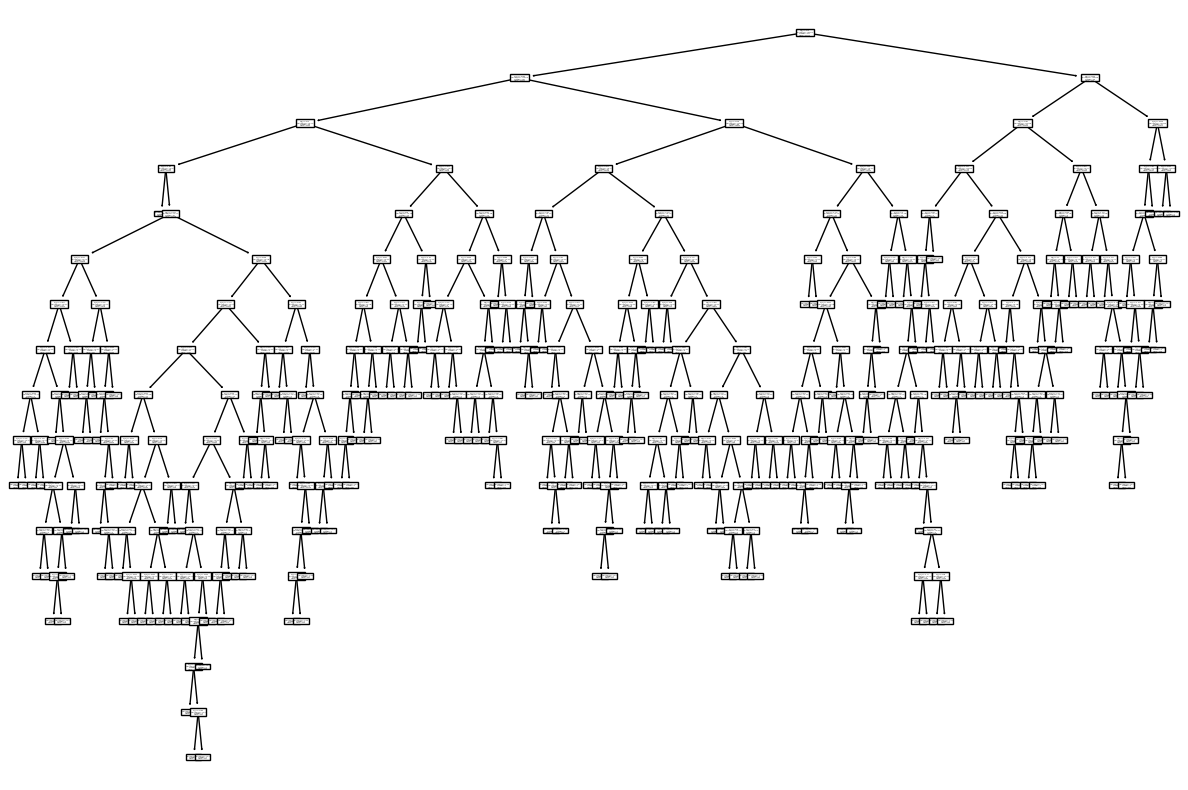

In [37]:
#Checking out the decision tree here
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(model)
plt.show()

In [42]:
#Lets checkout using the max_depth parameter
model_2 = DecisionTreeRegressor(max_depth=3)
model_2.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=3)

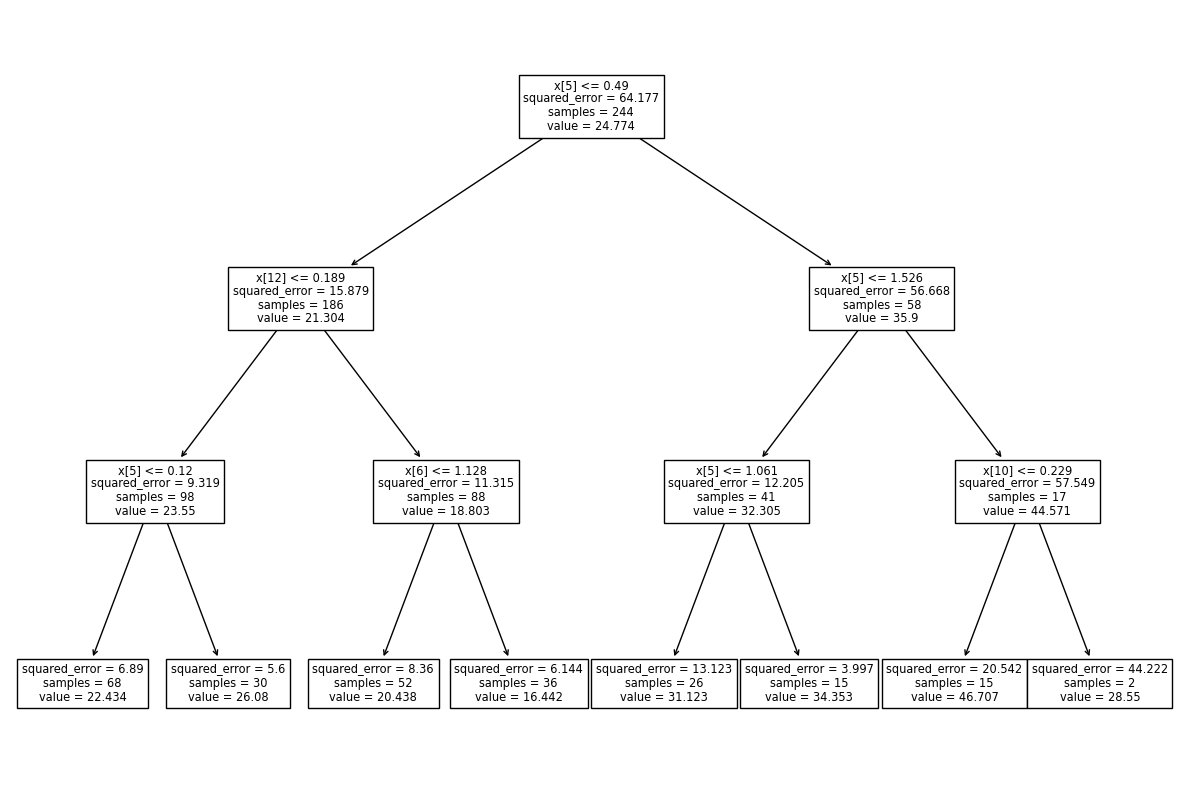

In [43]:
plt.figure(figsize=(15,10))
tree.plot_tree(model_2)
plt.show()

- It is basically giving better accuracy than that of the Linear Regression model

In [46]:
#adjusted R2 score
adj_score = 1 - (1-score)*(X.shape[0]-1)/(X.shape[0]-X.shape[1]-1)

In [47]:
adj_score

0.81892737560792

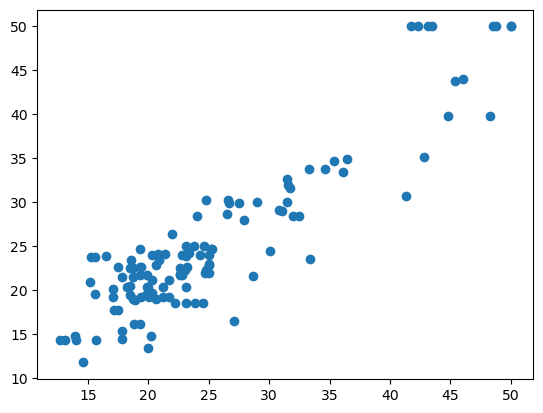

In [49]:
#Assumption1 
plt.scatter(y_test,y_pred)
plt.show()

- This is approximately linear

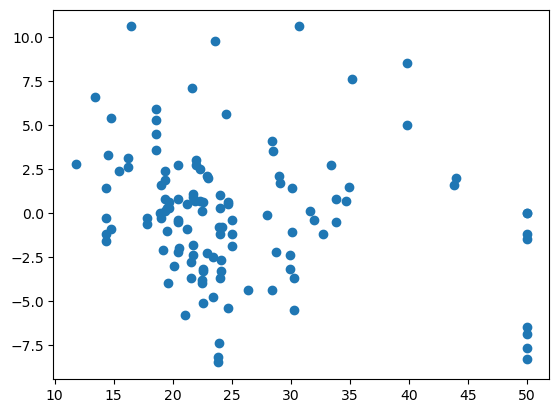

In [50]:
#Assumption2
res = y_test-y_pred
plt.scatter(y_pred,res)

- This is uniformly distributed

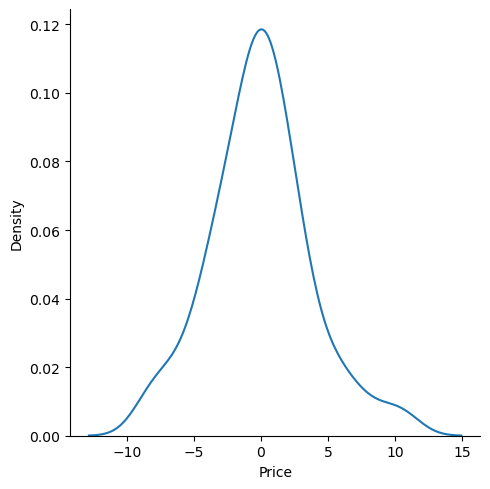

In [53]:
# Assumption 3
import seaborn as sns
sns.displot(res,kind='kde')

- This is approximately normally distributed